In [106]:
from clipppy import load_config

# these are just for plotting
import numpy as np
import corner
from matplotlib import pyplot as plt

In [111]:
config = load_config('linear.yaml')

In [108]:
config._model()

TypeError: __call__() missing 2 required positional arguments: 'X' and 'Y'

In [98]:
from pyrofit.lensing.utils import get_meshgrid
X, Y = get_meshgrid(0.0125, 400, 400)

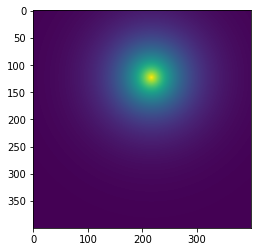

In [116]:
plt.imshow( config._model(X, Y) )

In [91]:
config.kwargs['defs']['XY']

(tensor([[-2.4938, -2.4813, -2.4688,  ...,  2.4688,  2.4813,  2.4938],
         [-2.4938, -2.4813, -2.4688,  ...,  2.4688,  2.4813,  2.4938],
         [-2.4938, -2.4813, -2.4688,  ...,  2.4688,  2.4813,  2.4938],
         ...,
         [-2.4938, -2.4813, -2.4688,  ...,  2.4688,  2.4813,  2.4938],
         [-2.4938, -2.4813, -2.4688,  ...,  2.4688,  2.4813,  2.4938],
         [-2.4938, -2.4813, -2.4688,  ...,  2.4688,  2.4813,  2.4938]]),
 tensor([[-2.4938, -2.4938, -2.4938,  ..., -2.4938, -2.4938, -2.4938],
         [-2.4813, -2.4813, -2.4813,  ..., -2.4813, -2.4813, -2.4813],
         [-2.4688, -2.4688, -2.4688,  ..., -2.4688, -2.4688, -2.4688],
         ...,
         [ 2.4688,  2.4688,  2.4688,  ...,  2.4688,  2.4688,  2.4688],
         [ 2.4813,  2.4813,  2.4813,  ...,  2.4813,  2.4813,  2.4813],
         [ 2.4938,  2.4938,  2.4938,  ...,  2.4938,  2.4938,  2.4938]]))

In [78]:
config._model.X

tensor([[-2.4938, -2.4813, -2.4688,  ...,  2.4688,  2.4813,  2.4938],
        [-2.4938, -2.4813, -2.4688,  ...,  2.4688,  2.4813,  2.4938],
        [-2.4938, -2.4813, -2.4688,  ...,  2.4688,  2.4813,  2.4938],
        ...,
        [-2.4938, -2.4813, -2.4688,  ...,  2.4688,  2.4813,  2.4938],
        [-2.4938, -2.4813, -2.4688,  ...,  2.4688,  2.4813,  2.4938],
        [-2.4938, -2.4813, -2.4688,  ...,  2.4688,  2.4813,  2.4938]])

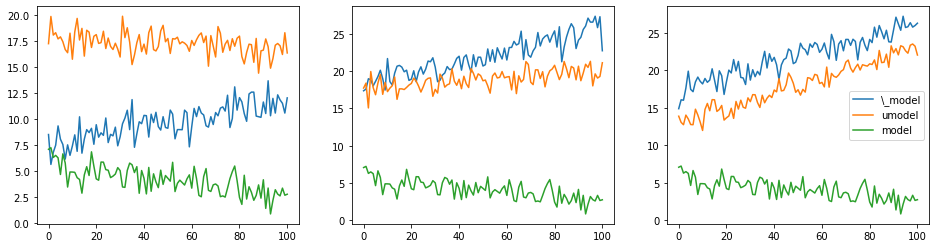

In [55]:
fig, axs = plt.subplots(1, 3, figsize = (16,4))
for ax in axs.flatten():
    ax.plot( config._model() , label = '\_model')
    ax.plot( config.umodel() , label = 'umodel')
    ax.plot( config.model()  , label = 'model')
ax.legend()
plt.show()

In [56]:
sersic = SersicSource()
lens =  sersic(X,Y, x = 0.3, y = 0.1, phi = 0., q = 1., index = 1., r_e = 1., I_e = 5.)

# Ignore below

  0%|          | 0/2000 [00:00<?, ?it/s]

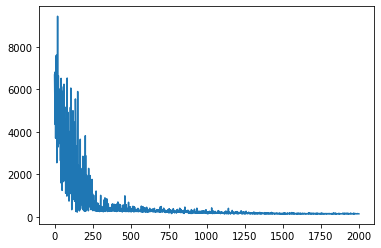

In [2]:
config = load_config('linear.yaml')
x = config._model.stochastic_specs['x']
y = config.conditioning['obs']
err = config._model.stochastic_specs['err']
losses = config.fit(lr=1e-2, n_steps=2000)

plt.plot(losses)

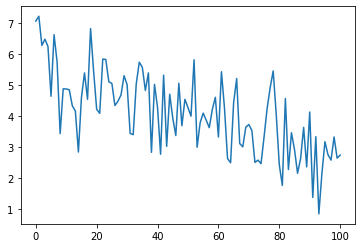

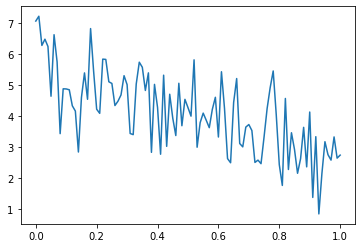

In [5]:
plt.plot(x, y)

In [6]:
ppd = config.ppd(plate_stack=[1000]) # do it for 1000 samples

param_names = ('a', 'b')

post_samples = {key: ppd['guide_trace'].nodes[key]['value'].detach().numpy()
                for key in param_names}
y_pred = ppd['model_trace'].nodes['y']['value']

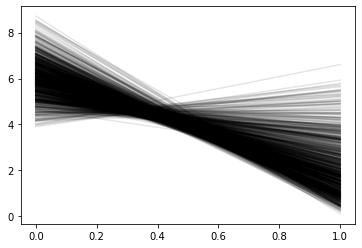

In [7]:
plt.plot(x, y_pred.T, 'k-', alpha = 0.1)
plt.show()

In [8]:
for m in ppd.keys():
    print(f'###{"#"*(len(m)+2)}###\n### {m} ###\n###{"#"*(len(m)+2)}###\n')
    for k in ppd[m].nodes.keys():
        v = ppd[m].nodes[k]['value']
        print(k, '\t', v.shape)
#         print(v)
        print('')
    

###################
### guide_trace ###
###################

plate_0 	 torch.Size([1000])

MultivariateNormal.loc 	 torch.Size([2])

MultivariateNormal.scale_tril 	 torch.Size([2, 2])

MultivariateNormal.guide_z 	 torch.Size([1000, 2])

a 	 torch.Size([1000])

b 	 torch.Size([1000])

###################
### model_trace ###
###################

plate_0 	 torch.Size([1000])

a 	 torch.Size([1000])

b 	 torch.Size([1000])

y 	 torch.Size([1000, 101])

obs 	 torch.Size([1000, 101])



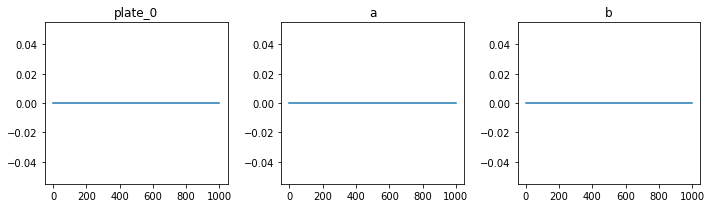

In [87]:
img = ['plate_0', 'a', 'b']
fig, axs = plt.subplots(1, len(img), figsize = (10, 3))
for i, ax in zip(img, axs):
    ax.plot(ppd['model_trace'].nodes[i]['value'] - ppd['guide_trace'].nodes[i]['value'])
    ax.set_title(i)
plt.tight_layout()
plt.show()

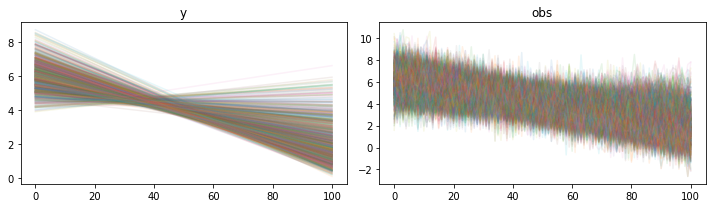

In [9]:
img = ['y', 'obs']
fig, axs = plt.subplots(1, len(img), figsize = (10, 3))
for i, ax in zip(img, axs):
#     ax.plot(ppd['model_trace'].nodes[i]['value'].T)
    ax.plot(ppd['model_trace'].nodes[i]['value'].T, alpha = 0.1)
    ax.set_title(i)
plt.tight_layout()
plt.show()

In [20]:
post_samples

{'a': array(-2.7328892, dtype=float32), 'b': array(5.701819, dtype=float32)}

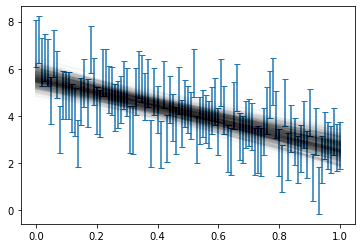

In [14]:
plt.errorbar(x, y, err, ls='none', capsize=3)
plt.plot(x, y_pred.T, 'k-', alpha=0.01);

/home/eliasd/.pyenv/versions/3.9.7/envs/lens-3.9.7/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3361: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


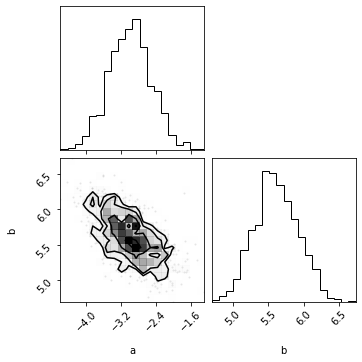

In [15]:
corner.corner(np.stack(post_samples.values(), -1), labels=param_names);